# Importando as Bibliotecas

In [4]:
#
import pandas as pd 
import numpy as np
# Gerados de numeros aleatorios
import random
# Grafico
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# SKlearn
## Valores nulos
from sklearn.impute import KNNImputer 
## Modelos
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
## Pré processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
## Metricas de avaliação
from sklearn.metrics import roc_curve, confusion_matrix, auc,classification_report, accuracy_score
# Processamento em paralelo 
from joblib import Parallel, delayed

# Data Frame

In [5]:
raw_df = pd.read_csv('base_jogadores.csv', sep=';')
pd.set_option('display.max_columns', raw_df.shape[1]) #Permite que todas as colunas sejam exibidas
raw_df.head()

<ipython-input-5-c863cb7876e1>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('base_jogadores.csv', sep=';')


,nomecompleto,idade,aniversario,aniversario_data,liga,temporada,posicao,clubenatemporada,minutosjogados_geral,minutosjogadosemcasa,minutosjogadosfora,nacionalidade,qtdjogos,qtdjogoscasa,qtdjogosfora,gols,golscasa,golsfora,assistencias,assistenciascasa,assistenciasfora,golsdepenalti,penaltisperdidos,semfazergols,semfazergolscasa,semfazergolsfora,golsofridos,golsofridoscasa,golssofridosfora,cartoesamarelos,cartoesvermelhos,golspor90minutos,assistenciaspor90minutos,golspor90min2,golspor90mincasa,golspor90minfora,minutosporgol,sofridospor90min,minporgolssofridos,minutosporpartida,minutosporcartao,minutosporassistencia,cartoespor90minutos,rankdaligaatacantes,rankdaligameiocampo,rankdaligadefensores,ranknoclube,detalhe,pais,liga.1,ano,anosub,ligaano,key,key2
0,adrià_collet_sallares,23.0,940489200.0,1999_10_21,PrimeraDivisio,2022_2023,Goalkeeper,fcsantacoloma,360.0,270.0,90.0,Spain,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,120.0,90.0,360.0,0.0,0.25,45.0,52.0,11.0,13.0,-3,outros,outra,2023.0,2022.0,outra2023,fcsantacoloma_out,fcsantacoloma_out_2022
1,adrià_gallego_arias,32.0,639644400.0,1990_04_09,PrimeraDivisio,2022_2023,Defender,interclubdescaldes,90.0,0.0,90.0,Spain,1.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,45.0,0.00,0.0,90.0,0.0,0.0,0.00,NaN,NaN,NaN,2.0,-3,outros,outra,2023.0,2022.0,outra2023,interclubdescaldes_out,interclubdescaldes_out_2022
2,adria_muñoz_fernandez,28.0,768812400.0,1994_05_13,PrimeraDivisio,2022_2023,Goalkeeper,interclubdescaldes,450.0,180.0,270.0,Spain,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,5.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,90.0,90.0,450.0,0.0,0.20,63.0,65.0,13.0,17.0,-3,outros,outra,2023.0,2022.0,outra2023,interclubdescaldes_out,interclubdescaldes_out_2022
3,adrian_da_cunha_costa_gomes,21.0,989996400.0,2001_05_16,PrimeraDivisio,2022_2023,Midfielder,uesantacoloma,89.0,25.0,64.0,Andorra,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,30.0,89.0,0.0,1.01,NaN,NaN,NaN,14.0,-3,outros,outra,2023.0,2022.0,outra2023,uesantacoloma_out,uesantacoloma_out_2022
4,adrian_ferrer_perez,21.0,981964800.0,2001_02_12,PrimeraDivisio,2022_2023,Forward,penyaencarnada,450.0,270.0,180.0,Spain,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.40,38.0,90.0,225.0,0.0,0.40,52.0,44.0,NaN,12.0,-3,outros,outra,2023.0,2022.0,outra2023,penyaencarnada_out,penyaencarnada_out_2022


In [6]:
print(f'Temos {raw_df.shape[0]} registros e {raw_df.shape[1]} colunas na nossa base de dados')

Temos 153354 registros e 55 colunas na nossa base de dados


## Analise dos Dados

### Analise de Dados Faltantes

In [7]:
# Verifica quantos dados nulos temos
raw_df.isnull().sum()

nomecompleto                   238
idade                          238
aniversario                    238
aniversario_data               238
liga                           238
temporada                      238
posicao                        238
clubenatemporada               238
minutosjogados_geral           246
minutosjogadosemcasa           241
minutosjogadosfora             244
nacionalidade                  238
qtdjogos                       238
qtdjogoscasa                   238
qtdjogosfora                   238
gols                           238
golscasa                       238
golsfora                       238
assistencias                   238
assistenciascasa               238
assistenciasfora               238
golsdepenalti                  238
penaltisperdidos               238
semfazergols                   238
semfazergolscasa               238
semfazergolsfora               238
golsofridos                    238
golsofridoscasa                238
golssofridosfora    

Temos muitas colunas com dados faltantes, iremos analisar se há causalidade.

<Axes: >

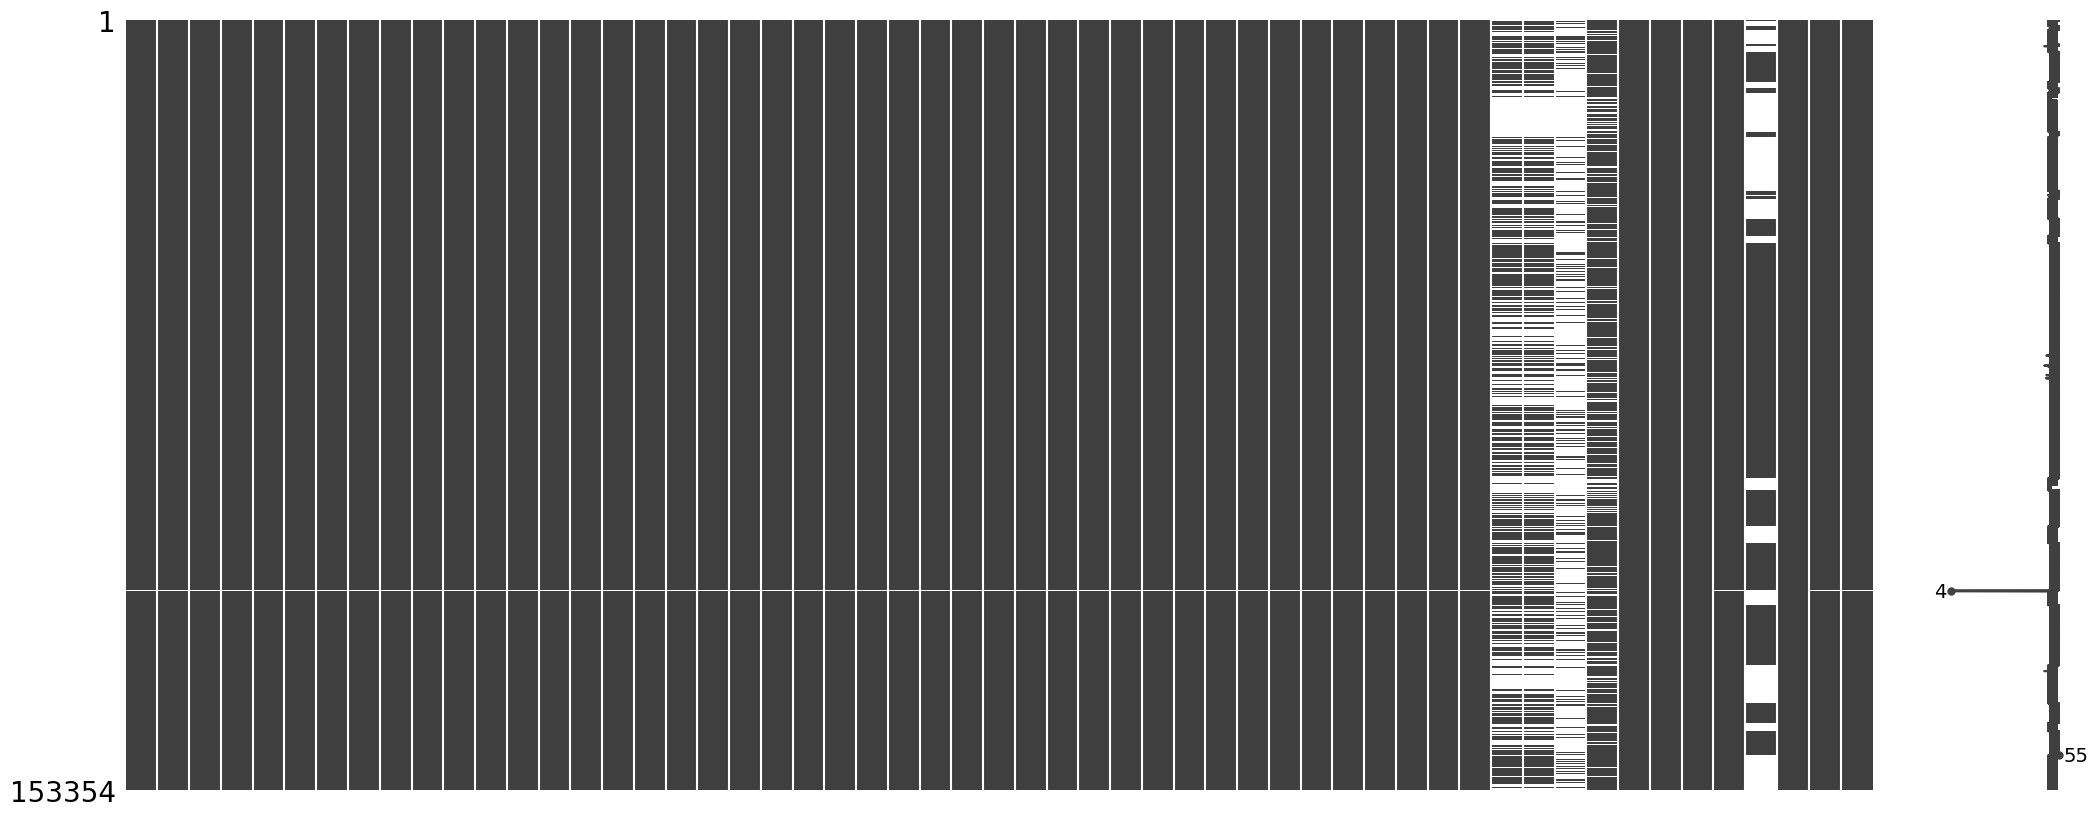

In [8]:
msno.matrix(raw_df)

Há 3 grupos de dados perdidos, iremos analisar cada um deles separados

<Axes: >

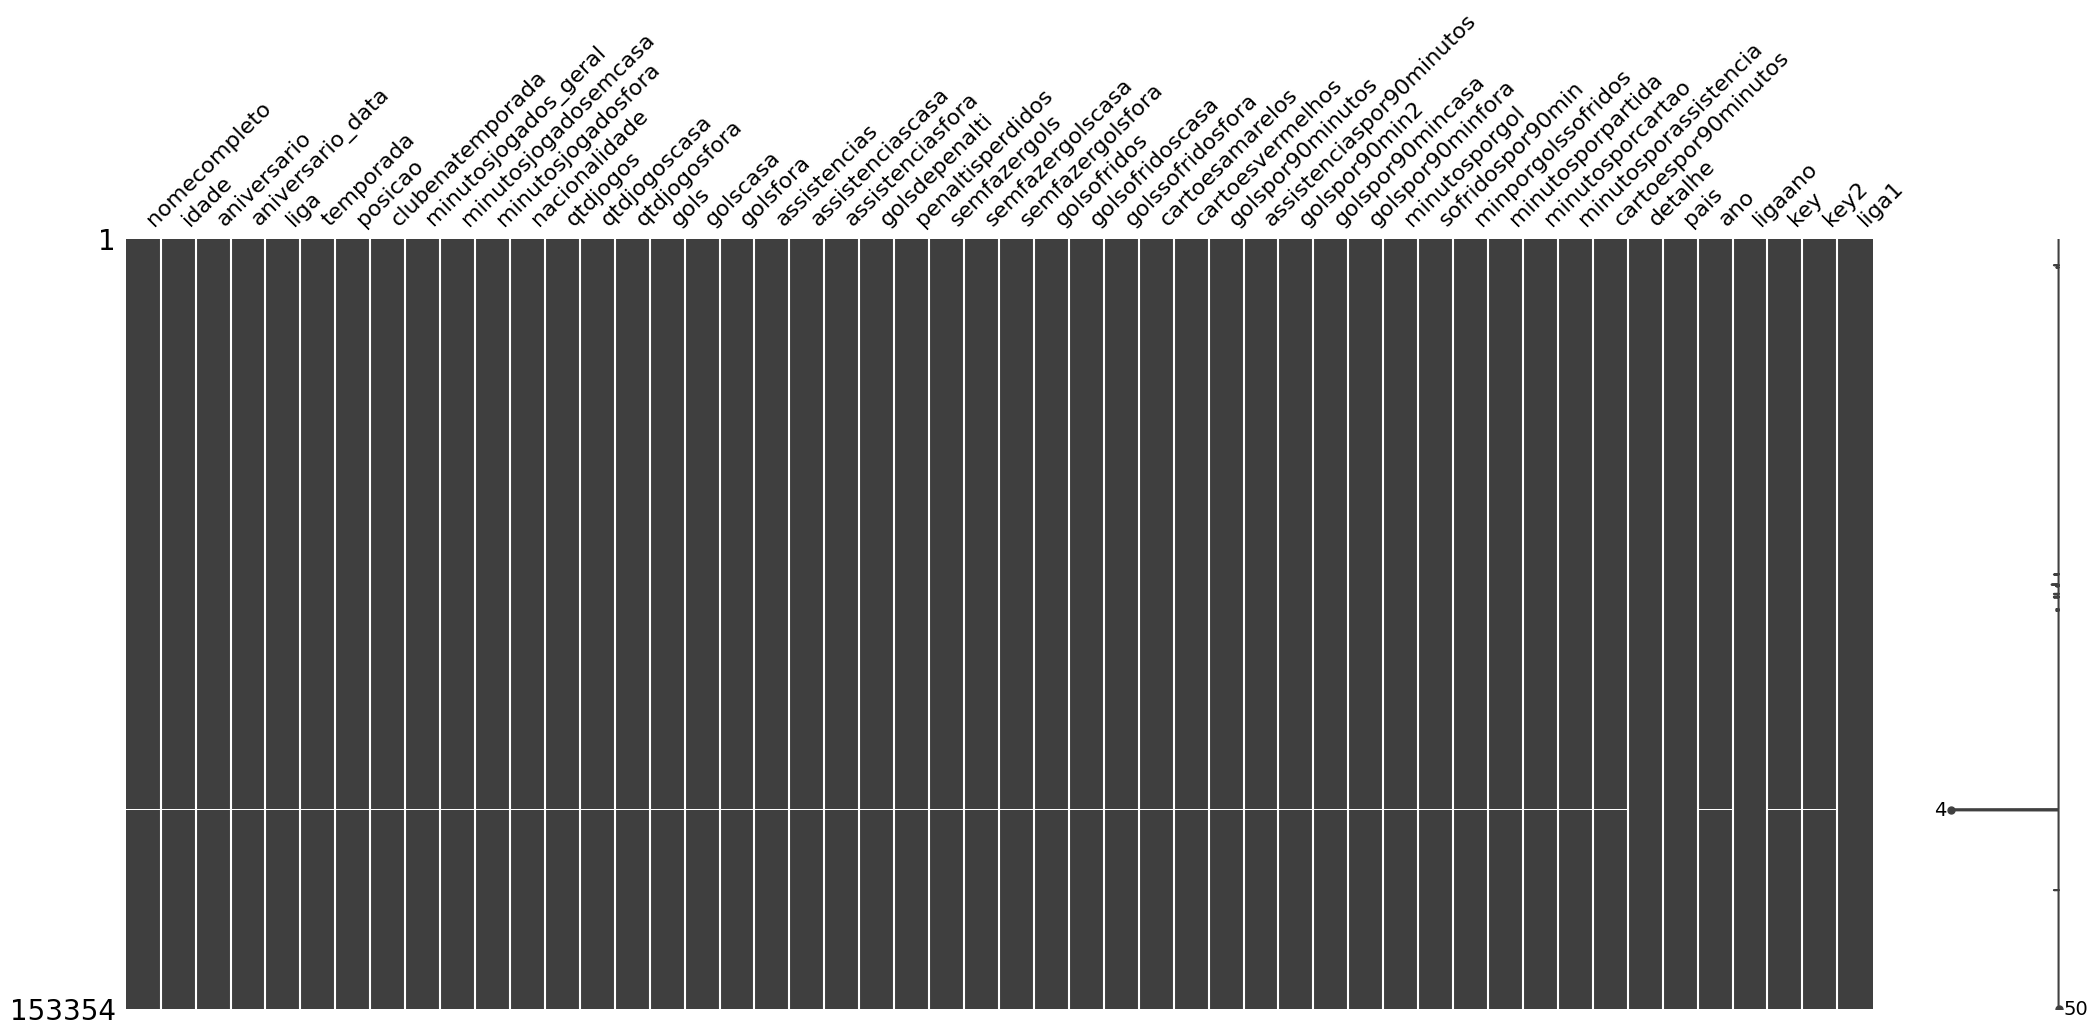

In [9]:
# Arrumando o nome da coluna para não dar erro nos loops seguintes
raw_df['liga1'] = raw_df['liga.1']
raw_df.drop(columns=['liga.1'], inplace=True)

# Analise de colunas com aproximidademente a mesma quantidade de dados nulos
col_filtrada = list(raw_df.drop(columns=['rankdaligaatacantes', 'rankdaligameiocampo', 'rankdaligadefensores', 'ranknoclube', 'anosub']).columns)
msno.matrix(raw_df[col_filtrada])

In [10]:
# Gerando listas que seram utilizadas para criar um DataFrame 
dados_nulos = []
## Porcentagem
dados_nulos_p = []
dic_col = {}

for i, col in enumerate(col_filtrada):
    dic_col[i] =  col
    
for col in col_filtrada:
    count_null = raw_df[col].isnull().sum() # Quantidade de dados nulos
    dados_nulos.append(count_null)  
    count_null_p = str((count_null * 100 / len(raw_df)).round(2)) + '%' # Transformando os valores obtidos em porcentagem
    dados_nulos_p.append(count_null_p)

# Criando DF para analise com os dados gerados
df_tab = pd.DataFrame({'Dados Faltantes': dados_nulos # Coluna com o total de dados faltantes
                        ,'(%)': dados_nulos_p}) # Representação em porcentagem dos valores

df_tab.rename(index = dic_col, inplace=True) # Renomeando os indices

df_tab.rename_axis('Colunas', axis=1, inplace=True) # Renomeando a coluna dos indices
df_tab

Colunas,Dados Faltantes,(%)
nomecompleto,238,0.16%
idade,238,0.16%
aniversario,238,0.16%
aniversario_data,238,0.16%
liga,238,0.16%
temporada,238,0.16%
posicao,238,0.16%
clubenatemporada,238,0.16%
minutosjogados_geral,246,0.16%
minutosjogadosemcasa,241,0.16%


Temos mais ou menos 238 registros com quase todas as colunas com os dados nulos, sendo considerada como dados perdidos não ao acaso.
Como o numeros de registros não representa nem 1% do nosso dataframe, iremos excluir esses registros.

In [11]:
len_df = raw_df.shape[0]

print('Antes:', len_df)
for i in range(1,len(col_filtrada)):
    col_index = list(raw_df.query(f'{col_filtrada[i-1]}.isnull()').index)
    raw_df.drop(index=col_index, inplace=True)

porc = 100 - (raw_df.shape[0] * 100 / len_df)    
print('Depois:', raw_df.shape[0], f'foi deletado {len_df - raw_df.shape[0]} registros, ou seja, {porc:.2f}% do DataFrame')

Antes: 153354
Depois: 153102 foi deletado 252 registros, ou seja, 0.16% do DataFrame


<Axes: >

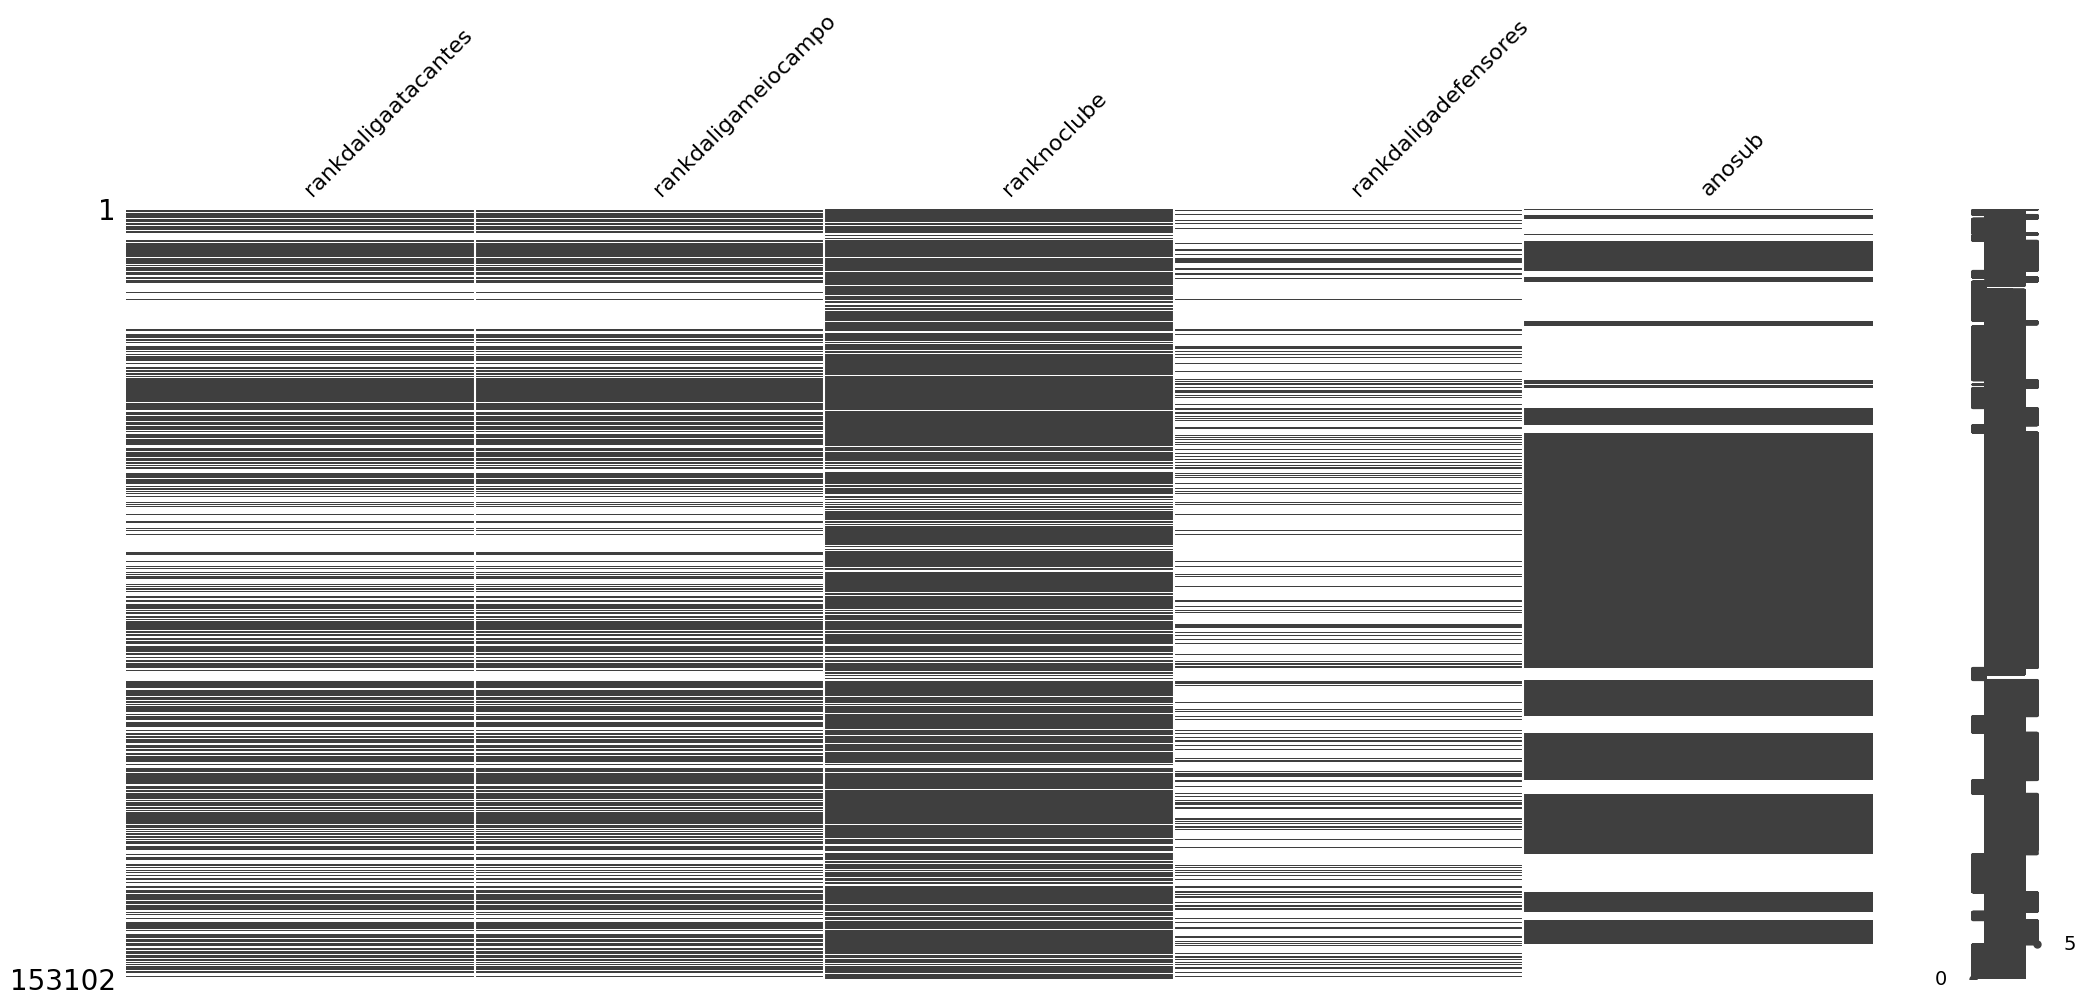

In [12]:
# Analise de colunas com a aproximidademente a mesma quantidade de dados nulos
col_filtrada = list(raw_df[['rankdaligaatacantes', 'rankdaligameiocampo', 'ranknoclube', 'rankdaligadefensores', 'anosub']])
msno.matrix(raw_df[col_filtrada])

<p>A coluna 0 e 1 apresenta o mesmo cenario anterior, quando não há dados em uma coluna não há na outra.</p>
<p>A coluna 2 na maioria das vezes é seguido o mesmo desenho de dados perdidos das colunas 0 e 1.</p>
<p>A coluna 3 quase não há dados preenchidos.</p>
<p>A coluna 4 apresenta dados perdidos completamente ao acaso.</p>

In [13]:
# Gerando os dados 
dados_nulos = []
dados_nulos_p = []
dic_col = {}

for i, col in enumerate(col_filtrada):
    dic_col[i] =  col
    
for col in col_filtrada:
    count_null = raw_df[col].isnull().sum() # Quantidade de dados nulos
    dados_nulos.append(count_null)  
    count_null_p = str((count_null * 100 / len(raw_df)).round(2)) + '%' # Transformando os valores obtidor em porcentagem
    dados_nulos_p.append(count_null_p)

# Criando DF para analise com os dados gerados
df_tab = pd.DataFrame({'Dados Faltantes': dados_nulos # Coluna com o total de dados faltantes
                        ,'(%)': dados_nulos_p}) # Representação em porcentagem dos valroes

df_tab.rename(index = dic_col, inplace=True)

df_tab.rename_axis('Colunas', axis=1, inplace=True) # Renomeando a coluna dos index
df_tab

Colunas,Dados Faltantes,(%)
rankdaligaatacantes,70157,45.82%
rankdaligameiocampo,70157,45.82%
ranknoclube,22249,14.53%
rankdaligadefensores,119763,78.22%
anosub,55236,36.08%


In [14]:
lendp = len(raw_df[raw_df.isnull().any(axis=1)])
print(f'Há {lendp} registros com algum dado nulo, ou seja, {lendp * 100 / raw_df.shape[0]:.2f}% dos registros contém alguma coluna com valor nulo')

Há 130167 registros com algum dado nulo, ou seja, 85.02% dos registros contém alguma coluna com valor nulo


Como há muitos dados faltantes irei utilizar um modelo para prever os dados nulos

In [15]:
# Esse processo demorou 25 minutos para rodar pelo google colab, devido o tamanho do DataFrame.
## Então para torna-lo mais eficiente, para uma possivel reprodução posterior do codigo, o DataFrame foi separado em 4 parte 
## e será executando ao mesmo tempo o processo de predição em todas as partes

# Dividir o dataframe em quatro partes
num_partitions = 4
partitions = np.array_split(raw_df, num_partitions)

# Função para executar a imputação em cada parte do dataframe
def impute_partition(partition):
    imputer = KNNImputer()
    df2 = imputer.fit_transform(partition[col_filtrada])
    partition[col_filtrada] = df2
    return partition

# Executar o processamento paralelo para cada parte do dataframe
results = Parallel(n_jobs=num_partitions)(delayed(impute_partition)(partition) for partition in partitions)

# Concatenar as partes do dataframe de volta em um único dataframe
df_imputed = pd.concat(results)

# Exibir estatísticas antes e depois da imputação
print('Estatísticas Antes:')
display(raw_df[col_filtrada].describe())

print('Estatísticas Depois:')
display(df_imputed[col_filtrada].describe())

raw_df[col_filtrada] = df_imputed[col_filtrada]

Estatísticas Antes:


,rankdaligaatacantes,rankdaligameiocampo,ranknoclube,rankdaligadefensores,anosub
count,82945.000000,82945.000000,130853.000000,33339.000000,97866.000000
mean,217.114606,217.104141,14.129221,88.636822,2018.253132
std,157.616036,157.599552,8.726925,66.424101,3.934466
min,1.000000,1.000000,1.000000,1.000000,2010.000000
25%,96.000000,96.000000,7.000000,39.000000,2014.000000
50%,196.000000,196.000000,13.000000,79.000000,2020.000000
75%,312.000000,312.000000,20.000000,126.000000,2021.000000
max,1364.000000,1364.000000,56.000000,588.000000,2022.000000


Estatísticas Depois:


,rankdaligaatacantes,rankdaligameiocampo,ranknoclube,rankdaligadefensores,anosub
count,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000
mean,231.053498,226.402001,14.170458,85.865375,2018.488104
std,154.060093,144.761668,8.123772,54.323108,3.361063
min,1.000000,1.000000,1.000000,1.000000,2010.000000
25%,128.000000,139.000000,8.000000,55.000000,2017.200000
50%,210.000000,207.000000,14.000000,79.110939,2019.400000
75%,309.000000,285.800000,19.000000,100.800000,2021.000000
max,1364.000000,1364.000000,56.000000,588.000000,2022.000000


Os dados estátisticos após o tratamento se mantem parecidos.

In [16]:
raw_df.isnull().sum()

nomecompleto                0
idade                       0
aniversario                 0
aniversario_data            0
liga                        0
temporada                   0
posicao                     0
clubenatemporada            0
minutosjogados_geral        0
minutosjogadosemcasa        0
minutosjogadosfora          0
nacionalidade               0
qtdjogos                    0
qtdjogoscasa                0
qtdjogosfora                0
gols                        0
golscasa                    0
golsfora                    0
assistencias                0
assistenciascasa            0
assistenciasfora            0
golsdepenalti               0
penaltisperdidos            0
semfazergols                0
semfazergolscasa            0
semfazergolsfora            0
golsofridos                 0
golsofridoscasa             0
golssofridosfora            0
cartoesamarelos             0
cartoesvermelhos            0
golspor90minutos            0
assistenciaspor90minutos    0
golspor90m

### Analise de Outliers

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153102 entries, 0 to 153353
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nomecompleto              153102 non-null  object 
 1   idade                     153102 non-null  float64
 2   aniversario               153102 non-null  float64
 3   aniversario_data          153102 non-null  object 
 4   liga                      153102 non-null  object 
 5   temporada                 153102 non-null  object 
 6   posicao                   153102 non-null  object 
 7   clubenatemporada          153102 non-null  object 
 8   minutosjogados_geral      153102 non-null  float64
 9   minutosjogadosemcasa      153102 non-null  float64
 10  minutosjogadosfora        153102 non-null  float64
 11  nacionalidade             153102 non-null  object 
 12  qtdjogos                  153102 non-null  float64
 13  qtdjogoscasa              153102 non-null  f

Só temos colunas do tipo object e float

In [18]:
# Separando as colunas do tipo float para analisar os outliers
columns = []
for col in raw_df.columns:
    if np.dtype(raw_df[col]) == 'float64':
        columns.append(col)

# Listas que serão usadas posteriormente
list_outliers = []
## Porcentagem
list_outliers_p = []
## Porcentagem Formatada
list_outliers_p_form = []
## Nome das colunas
dic_col = {}
index = 0

# Calculando os outliers de cada coluna
for i, col in enumerate(columns):
    # Formula de outlier
    Q1 = raw_df[col].quantile(0.25)
    Q3 = raw_df[col].quantile(0.75)
    IIQ = Q3 - Q1
    ls_r = Q3 + (1.5 * IIQ)   
    li_r = Q1 - (1.5 * IIQ)  
    # Separando os outlier
    outliers_r = (raw_df[col] < li_r) | (raw_df[col] > ls_r)
    numero_outliers = len(outliers_r[outliers_r == True])
        
    # Se a coluna tiver outliers...
    if numero_outliers > 0:
        # Armazena o nome da coluna
        dic_col[index] =  col
        index += 1
        # Quantidade de outlier
        list_outliers.append(numero_outliers)
        list_outliers_p_form.append(str(round((numero_outliers * 100 / len(raw_df)), 2)) + '%')
        list_outliers_p.append(round((numero_outliers * 100 / len(raw_df)), 2))
    
# Criando DF para analise com os dados gerados
df_tab = pd.DataFrame({'Dados Faltantes': list_outliers # Coluna com o total de dados faltantes
                        ,'(%)': list_outliers_p_form}) # Representação em porcentagem dos valroes

df_tab.rename(index = dic_col, inplace=True)

df_tab.rename_axis('Colunas', axis=1, inplace=True) # Renomeando a coluna dos index
df_tab

Colunas,Dados Faltantes,(%)
idade,911,0.6%
aniversario,514,0.34%
minutosjogados_geral,3599,2.35%
minutosjogadosemcasa,3490,2.28%
minutosjogadosfora,3129,2.04%
qtdjogos,34,0.02%
qtdjogoscasa,58,0.04%
qtdjogosfora,51,0.03%
gols,18367,12.0%
golscasa,37107,24.24%


In [19]:
# Colunas numericas
for col in columns:
  # Avaliando se a coluna poderia ser do tipo int
  if len(list(((raw_df[col] % 1) > 0).value_counts())) == 1: 
    # Tratando a coluna com o tipo correto
    raw_df[col] = raw_df[col].astype(int)
# Verificando o resultado das modificações
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153102 entries, 0 to 153353
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nomecompleto              153102 non-null  object 
 1   idade                     153102 non-null  int64  
 2   aniversario               153102 non-null  int64  
 3   aniversario_data          153102 non-null  object 
 4   liga                      153102 non-null  object 
 5   temporada                 153102 non-null  object 
 6   posicao                   153102 non-null  object 
 7   clubenatemporada          153102 non-null  object 
 8   minutosjogados_geral      153102 non-null  int64  
 9   minutosjogadosemcasa      153102 non-null  int64  
 10  minutosjogadosfora        153102 non-null  int64  
 11  nacionalidade             153102 non-null  object 
 12  qtdjogos                  153102 non-null  int64  
 13  qtdjogoscasa              153102 non-null  i

In [20]:
# As funções abaixo iram gerar um numero aleatorio com base no limete mais proximo considerando o desvio padrão da coluna
# Uma função calcula os valores para o limite superior e a outra para o inferior, levando em consideração de a coluna é do tipo inteiro ou float

## Limite Inferior
def limiteInfStd(li_r, col_std, tipo='int'):
  if tipo == 'float':
    # Definir o intervalo com o desvio
    inicio = li_r - col_std
    fim = li_r + col_std
    # Gera o numero aleatorio
    return random.uniform(inicio, fim)
  else:
    # Definir o intervalo com o desvio
    inicio = int(li_r - col_std)
    fim = int(li_r + col_std)
    # Gera o numero aleatorio
    return random.randint(inicio, fim)

## Limite Superior
def limiteSupStd(ls_r, col_std, tipo='int'):
  if tipo == 'float':
    # Definir o intervalo com o desvio
    inicio = ls_r - col_std
    fim = ls_r + col_std
    # Gera o numero aleatorio
    return random.uniform(inicio, fim)
  else:
    # Definir o intervalo com o desvio
    inicio = int(ls_r - col_std)
    fim = int(ls_r + col_std)
    # Gera o numero aleatorio
    return random.randint(inicio, fim)

In [21]:
print('Estatistica Antes:')
display(raw_df[columns].describe())

# Calculando os outliers de cada coluna
for col in columns:
  # Formula de outlier
  Q1 = raw_df[col].quantile(0.25)
  Q3 = raw_df[col].quantile(0.75)
  IIQ = Q3 - Q1
  # Define os limites
  ls_r = Q3 + (1.5 * IIQ)   
  li_r = Q1 - (1.5 * IIQ)  
  # Define o desvio padrão
  col_std = raw_df.idade.std()

  if np.dtype(raw_df[col]) == 'float64':
    raw_df[col] = np.where(raw_df[col] < li_r, limiteInfStd(li_r, col_std, 'float'), raw_df[col])
    raw_df[col] = np.where(raw_df[col] > ls_r, limiteSupStd(ls_r, col_std, 'float'), raw_df[col])
  else:
    raw_df[col] = np.where(raw_df[col] < li_r, limiteInfStd(li_r, col_std), raw_df[col])
    raw_df[col] = np.where(raw_df[col] > ls_r, limiteSupStd(ls_r, col_std), raw_df[col])

print('Estatistica Depois:')
raw_df[columns].describe()

Estatistica Antes:


,idade,aniversario,minutosjogados_geral,minutosjogadosemcasa,minutosjogadosfora,qtdjogos,qtdjogoscasa,qtdjogosfora,gols,golscasa,golsfora,assistencias,assistenciascasa,assistenciasfora,golsdepenalti,penaltisperdidos,semfazergols,semfazergolscasa,semfazergolsfora,golsofridos,golsofridoscasa,golssofridosfora,cartoesamarelos,cartoesvermelhos,golspor90minutos,assistenciaspor90minutos,golspor90min2,golspor90mincasa,golspor90minfora,minutosporgol,sofridospor90min,minporgolssofridos,minutosporpartida,minutosporcartao,minutosporassistencia,cartoespor90minutos,rankdaligaatacantes,rankdaligameiocampo,rankdaligadefensores,ranknoclube,ano,anosub
count,153102.000000,1.531020e+05,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000
mean,28.352569,7.577012e+08,748.471085,374.380524,374.090561,11.055101,5.526786,5.528314,0.985310,0.553239,0.432071,0.599039,0.333797,0.265241,0.092370,0.023207,3.073154,1.788990,1.284163,10.245954,4.485820,5.760134,1.658345,0.089431,0.157067,0.056891,0.100174,0.107997,0.083639,230.081965,1.117799,61.114009,52.356801,252.141533,224.103696,0.231862,231.053498,226.402001,85.865375,14.170458,2019.704916,2018.488104
std,5.973542,1.899399e+08,879.896205,446.999250,440.692987,11.244249,5.706335,5.651623,2.370789,1.423842,1.153236,1.416686,0.885471,0.735066,0.518876,0.171491,3.702402,2.255745,1.769607,12.502961,5.835563,7.193965,2.490584,0.319223,0.642788,0.318399,0.548820,0.643980,0.542484,507.915911,1.181532,54.113674,32.134858,407.201801,511.295510,1.020528,154.060093,144.761668,54.323108,8.123772,3.559532,3.361063
min,15.000000,-4.514148e+08,-76.000000,-62.000000,-32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,-21.000000,0.000000,-34.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2011.000000,2010.000000
25%,24.000000,6.290208e+08,69.000000,15.000000,19.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330000,15.000000,24.000000,0.000000,0.000000,0.000000,128.000000,139.000000,55.000000,8.000000,2019.000000,2017.200000
50%,28.000000,7.682076e+08,360.000000,180.000000,180.000000,6.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,5.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.050000,60.000000,60.000000,89.000000,0.000000,0.070000,210.000000,207.000000,79.110939,14.000000,2021.000000,2019.400000
75%,32.000000,9.092988e+08,1222.000000,613.000000,616.000000,20.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,16.000000,7.000000,9.000000,2.000000,0.000000,0.190000,0.040000,0.090000,0.000000,0.000000,227.000000,1.500000,86.000000,82.000000,360.000000,150.000000,0.270000,309.000000,285.800000,100.800000,19.000000,2022.000000,2021.000000
max,67.000000,1.182150e+09,8540.000000,4950.000000,4301.000000,100.000000,55.000000,50.000000,50.000000,35.000000,23.000000,21.000000,15.000000,13.000000,14.000000,5.000000,41.000000,21.000000,41.000000,86.000000,44.000000,73.000000,216.000000,16.000000,90.000000,45.000000,90.000000,90.000000,90.000000,432

Estatistica Depois:


,idade,aniversario,minutosjogados_geral,minutosjogadosemcasa,minutosjogadosfora,qtdjogos,qtdjogoscasa,qtdjogosfora,gols,golscasa,golsfora,assistencias,assistenciascasa,assistenciasfora,golsdepenalti,penaltisperdidos,semfazergols,semfazergolscasa,semfazergolsfora,golsofridos,golsofridoscasa,golssofridosfora,cartoesamarelos,cartoesvermelhos,golspor90minutos,assistenciaspor90minutos,golspor90min2,golspor90mincasa,golspor90minfora,minutosporgol,sofridospor90min,minporgolssofridos,minutosporpartida,minutosporcartao,minutosporassistencia,cartoespor90minutos,rankdaligaatacantes,rankdaligameiocampo,rankdaligadefensores,ranknoclube,ano,anosub
count,153102.000000,1.531020e+05,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000,153102.000000
mean,28.331589,7.579079e+08,741.040646,370.881843,370.957780,11.053657,5.523906,5.528399,0.864306,1.211839,-0.213681,0.709148,0.564545,0.660004,0.048347,0.101599,2.862164,1.704295,1.068712,10.128378,4.241342,5.760513,1.505957,-0.080665,0.465548,0.244228,0.575452,1.099093,-0.331795,130.775953,1.134785,59.560731,52.356801,217.017981,88.258442,-0.111148,224.790531,218.875440,81.231898,14.098312,2020.563023,2018.161621
std,5.913585,1.892714e+08,858.371739,436.683718,431.430409,11.238243,5.696895,5.651120,1.625807,2.142585,0.409906,1.633855,1.172576,1.484731,0.214499,0.705461,3.197413,2.016719,1.368597,12.103891,5.141974,7.152054,1.943900,0.272321,1.194293,0.532710,1.361826,1.944040,0.636522,214.163963,1.113674,47.248851,32.134858,277.868935,152.887771,0.990270,129.258008,116.309484,37.560169,7.929880,2.352624,4.234398
min,15.000000,2.086038e+08,-76.000000,-62.000000,-32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.552902,-9.000000,0.000000,-21.000000,0.000000,-34.000000,0.000000,-4.045944,1.000000,1.000000,1.000000,1.000000,2015.000000,2005.752689
25%,24.000000,6.290208e+08,69.000000,15.000000,19.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330000,15.000000,24.000000,0.000000,0.000000,0.000000,128.000000,139.000000,55.000000,8.000000,2020.000000,2017.200000
50%,28.000000,7.682076e+08,360.000000,180.000000,180.000000,6.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,5.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.050000,60.000000,60.000000,89.000000,0.000000,0.000000,210.000000,207.000000,79.110939,14.000000,2021.000000,2019.400000
75%,32.000000,9.092988e+08,1222.000000,613.000000,616.000000,20.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,16.000000,7.000000,9.000000,2.000000,0.000000,0.190000,0.040000,0.090000,0.000000,0.000000,227.000000,1.500000,86.000000,82.000000,360.000000,150.000000,0.220000,309.000000,285.800000,100.800000,19.000000,2022.000000,2021.000000
max,44.000000,1.182150e+09,2951.000000,1510.000000,1511.000000,47.000000,23.000000,26.000000,5.000000,5.000000,0.000000,6.000000,3.000000,4.000000,1.000000,5.000000,12.000000,7.000000,5.000000,43.000000,17.000000,27.000000,6.000000,0.000000,4.040590,1.441103,3.930515,4.537626,0.000000,570.000000,5.94

Os dados estátisticos após o tratamento se mantem parecidos.

### Analise de Dados Duplicados

In [22]:
display(raw_df.shape)
raw_df.drop_duplicates().shape

(153102, 55)

(153102, 55)

Não há dados duplicados

### Exportando o DataFrame

Como o tratamento envolve aleatoriedade iremos salva a versão dos dados usados para que o codigo possa ser replicado.

In [ ]:
raw_df.to_csv('base_jogadores_tratada.csv', sep=';', index=False)

# Analise Exploratoria dos dados

In [24]:
df = pd.read_csv('base_jogadores_tratada.csv', sep=';')
pd.set_option('display.max_columns', df.shape[1]) #Permite que todas as colunas sejam exibidas
df.head()

<ipython-input-24-877fb2a7e222>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('base_jogadores_tratada.csv', sep=';')


,nomecompleto,idade,aniversario,aniversario_data,liga,temporada,posicao,clubenatemporada,minutosjogados_geral,minutosjogadosemcasa,minutosjogadosfora,nacionalidade,qtdjogos,qtdjogoscasa,qtdjogosfora,gols,golscasa,golsfora,assistencias,assistenciascasa,assistenciasfora,golsdepenalti,penaltisperdidos,semfazergols,semfazergolscasa,semfazergolsfora,golsofridos,golsofridoscasa,golssofridosfora,cartoesamarelos,cartoesvermelhos,golspor90minutos,assistenciaspor90minutos,golspor90min2,golspor90mincasa,golspor90minfora,minutosporgol,sofridospor90min,minporgolssofridos,minutosporpartida,minutosporcartao,minutosporassistencia,cartoespor90minutos,rankdaligaatacantes,rankdaligameiocampo,rankdaligadefensores,ranknoclube,detalhe,pais,ano,anosub,ligaano,key,key2,liga1
0,adrià_collet_sallares,23,940489200,1999_10_21,PrimeraDivisio,2022_2023,Goalkeeper,fcsantacoloma,360,270,90,Spain,4,3,1,0,0,0,0,0,0,0,0,2,1,1,3,3,0,1,0,0.000000,0.0,0.000000,0.0,0.000000,0,0.75,120,90,360,0,0.250000,45.0,52.0,11.0,13.0,-3,outros,2023,2022.0,outra2023,fcsantacoloma_out,fcsantacoloma_out_2022,outra
1,adrià_gallego_arias,32,639644400,1990_04_09,PrimeraDivisio,2022_2023,Defender,interclubdescaldes,90,0,90,Spain,1,0,1,2,0,-2,0,0,0,0,0,1,0,1,0,0,0,0,0,-2.281309,0.0,-3.443204,0.0,-3.264922,45,0.00,0,90,0,0,0.000000,41.0,129.0,60.6,2.0,-3,outros,2023,2022.0,outra2023,interclubdescaldes_out,interclubdescaldes_out_2022,outra
2,adria_muñoz_fernandez,28,768812400,1994_05_13,PrimeraDivisio,2022_2023,Goalkeeper,interclubdescaldes,450,180,270,Spain,5,2,3,0,0,0,0,0,0,0,0,2,1,1,5,1,4,1,0,0.000000,0.0,0.000000,0.0,0.000000,0,1.00,90,90,450,0,0.200000,63.0,65.0,13.0,17.0,-3,outros,2023,2022.0,outra2023,interclubdescaldes_out,interclubdescaldes_out_2022,outra
3,adrian_da_cunha_costa_gomes,21,989996400,2001_05_16,PrimeraDivisio,2022_2023,Midfielder,uesantacoloma,89,25,64,Andorra,3,1,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.000000,0.0,0.000000,0.0,0.000000,0,0.00,0,30,89,0,-3.985633,174.8,223.6,80.0,14.0,-3,outros,2023,2022.0,outra2023,uesantacoloma_out,uesantacoloma_out_2022,outra
4,adrian_ferrer_perez,21,981964800,2001_02_12,PrimeraDivisio,2022_2023,Forward,penyaencarnada,450,270,180,Spain,5,3,2,0,0,0,0,0,0,0,0,0,0,0,12,5,7,2,0,0.000000,0.0,0.000000,0.0,0.000000,0,2.40,38,90,225,0,0.400000,52.0,44.0,17.4,12.0,-3,outros,2023,2022.0,outra2023,penyaencarnada_out,penyaencarnada_out_2022,outra


<p>Problema:</p>
<p>Prever a classe de interações de um jogador, ou seja, se ele faz gol, faz penalti, se tem assistencias e etc.</p>

Iremos ver quais são as colunas que estão mais associadas a essas variaveis

In [25]:
# possiveis variaveis associadas
test1 = df[['ranknoclube', 'rankdaligadefensores', 'rankdaligameiocampo', 'rankdaligaatacantes', 'idade', 'liga', 'posicao', 'temporada', 'clubenatemporada', 'liga1', 'anosub',
# Variaveis de interação
            'minutosjogados_geral', 'gols', 'assistencias', 'penaltisperdidos', 'golsdepenalti', 'golsofridos', 'cartoesamarelos', 'cartoesvermelhos']]

<ipython-input-26-796c22b85b22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = test1.corr()


<Axes: >

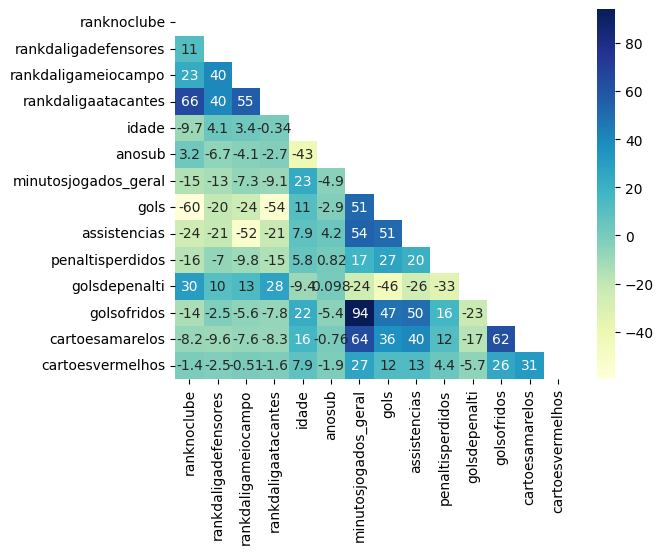

In [26]:
corr = test1.corr()
# Cria uma máscara para ocultar a metade superior
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr*100, annot=True, cmap='YlGnBu', mask=mask)

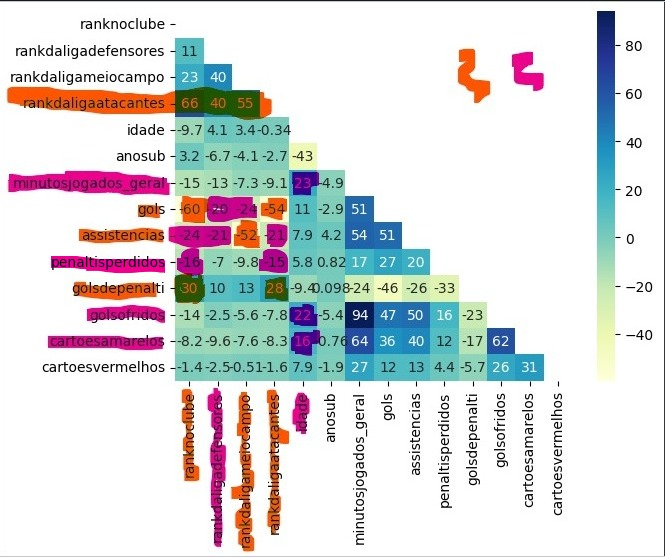

* Cor laranja: Correlação Altissima
* Cor rosa: Correlação alta




## ranknoclube

In [27]:
df['ranknoclube'].describe()

count    153102.000000
mean         14.094717
std           7.922370
min           1.000000
25%           8.000000
50%          14.000000
75%          19.000000
max          35.000000
Name: ranknoclube, dtype: float64

In [28]:
# Separando em classes para poder analisar melhor as colunas respostas
bins = list(range(1, 37, 7))
labels = list(range(0, 5))
df['partrankclube'] = pd.cut(x = df['ranknoclube'],
                      bins = bins,
                  labels = labels,
            include_lowest = True)

In [29]:
for i in [0, 1, 2, 3, 4]:
  print(f'Rank {i}')
  display(df[df['partrankclube'] == i][['minutosjogados_geral', 'gols', 'assistencias', 'penaltisperdidos', 'golsdepenalti', 'golsofridos', 'cartoesamarelos', 'cartoesvermelhos']].mean().round(2))

Rank 0


minutosjogados_geral    1111.33
gols                       3.11
assistencias               0.75
penaltisperdidos           0.06
golsdepenalti             -0.32
golsofridos               14.79
cartoesamarelos            1.60
cartoesvermelhos           0.21
dtype: float64

Rank 1


minutosjogados_geral    530.19
gols                      0.40
assistencias              0.28
penaltisperdidos          0.01
golsdepenalti            -0.03
golsofridos               7.14
cartoesamarelos           0.88
cartoesvermelhos          0.12
dtype: float64

Rank 2


minutosjogados_geral    553.80
gols                      0.04
assistencias              0.21
penaltisperdidos          0.00
golsdepenalti            -0.00
golsofridos               7.54
cartoesamarelos           0.93
cartoesvermelhos          0.13
dtype: float64

Rank 3


minutosjogados_geral    835.03
gols                      0.00
assistencias              0.33
penaltisperdidos          0.00
golsdepenalti            -0.00
golsofridos              11.54
cartoesamarelos           1.40
cartoesvermelhos          0.20
dtype: float64

Rank 4


minutosjogados_geral    796.14
gols                      0.00
assistencias              0.28
penaltisperdidos          0.01
golsdepenalti             0.00
golsofridos              11.21
cartoesamarelos           1.40
cartoesvermelhos          0.22
dtype: float64

Os ranking gerados se diferenciam por gols e gols sofridos

## rankdaligameiocampo

In [30]:
df['rankdaligameiocampo'].describe()

count    153102.000000
mean        218.908890
std         116.391495
min           1.000000
25%         139.000000
50%         207.000000
75%         285.800000
max         506.000000
Name: rankdaligameiocampo, dtype: float64

In [31]:
# Separando em classes para poder analisar melhor as colunas respostas
bins = list(range(1, 700, 100))
labels = list(range(0, 6))
df['partrankmeiocampo'] = pd.cut(x = df['rankdaligameiocampo'],
                      bins = bins,
                  labels = labels,
            include_lowest = True)

In [32]:
for i in [0, 1, 2, 3, 4]:
  print(f'Rank {i}')
  display(df[df['partrankmeiocampo'] == i][['minutosjogados_geral', 'gols', 'assistencias', 'penaltisperdidos', 'golsdepenalti', 'golsofridos', 'cartoesamarelos', 'cartoesvermelhos']].mean().round(2))

Rank 0


minutosjogados_geral    1113.33
gols                       2.29
assistencias               1.28
penaltisperdidos           0.06
golsdepenalti             -0.26
golsofridos               14.39
cartoesamarelos            1.74
cartoesvermelhos           0.21
dtype: float64

Rank 1


minutosjogados_geral    703.46
gols                      1.03
assistencias              0.48
penaltisperdidos          0.02
golsdepenalti            -0.10
golsofridos               9.58
cartoesamarelos           1.14
cartoesvermelhos          0.15
dtype: float64

Rank 2


minutosjogados_geral    521.79
gols                      0.52
assistencias              0.14
penaltisperdidos          0.01
golsdepenalti            -0.04
golsofridos               7.19
cartoesamarelos           0.84
cartoesvermelhos          0.12
dtype: float64

Rank 3


minutosjogados_geral    834.39
gols                      0.67
assistencias              0.04
penaltisperdidos          0.01
golsdepenalti            -0.05
golsofridos              11.55
cartoesamarelos           1.29
cartoesvermelhos          0.20
dtype: float64

Rank 4


minutosjogados_geral    1073.26
gols                       0.78
assistencias               0.01
penaltisperdidos           0.01
golsdepenalti             -0.07
golsofridos               14.35
cartoesamarelos            1.64
cartoesvermelhos           0.23
dtype: float64

Os rankings gerados ajudam a entender a variavel assistencia

## rankdaligaatacantes

In [33]:
df['rankdaligaatacantes'].describe()

count    153102.000000
mean        224.896103
std         129.549724
min           1.000000
25%         128.000000
50%         210.000000
75%         309.000000
max         585.005323
Name: rankdaligaatacantes, dtype: float64

In [34]:
# Separando em classes para poder analisar melhor as colunas respostas
bins = list(range(1, 700, 100))
labels = list(range(0, 6))
df['partrankatacante'] = pd.cut(x = df['rankdaligaatacantes'],
                      bins = bins,
                  labels = labels,
            include_lowest = True)

In [35]:
for i in [0, 1, 2, 3, 4]:
  print(f'Rank {i}')
  display(df[df['partrankatacante'] == i][['minutosjogados_geral', 'gols', 'assistencias', 'penaltisperdidos', 'golsdepenalti', 'golsofridos', 'cartoesamarelos', 'cartoesvermelhos']].mean().round(2))

Rank 0


minutosjogados_geral    937.67
gols                      3.28
assistencias              0.72
penaltisperdidos          0.07
golsdepenalti            -0.39
golsofridos              12.30
cartoesamarelos           1.46
cartoesvermelhos          0.18
dtype: float64

Rank 1


minutosjogados_geral    777.13
gols                      1.09
assistencias              0.44
penaltisperdidos          0.02
golsdepenalti            -0.07
golsofridos              10.49
cartoesamarelos           1.24
cartoesvermelhos          0.17
dtype: float64

Rank 2


minutosjogados_geral    600.37
gols                      0.22
assistencias              0.26
penaltisperdidos          0.00
golsdepenalti            -0.01
golsofridos               8.23
cartoesamarelos           0.95
cartoesvermelhos          0.14
dtype: float64

Rank 3


minutosjogados_geral    705.09
gols                      0.04
assistencias              0.26
penaltisperdidos          0.00
golsdepenalti            -0.00
golsofridos               9.78
cartoesamarelos           1.13
cartoesvermelhos          0.17
dtype: float64

Rank 4


minutosjogados_geral    791.81
gols                      0.02
assistencias              0.28
penaltisperdidos          0.00
golsdepenalti            -0.00
golsofridos              10.69
cartoesamarelos           1.21
cartoesvermelhos          0.17
dtype: float64

Os rankings gerados ajudam a entender as variaveis gols e gols sofridos

## rankdaligadefensores

In [36]:
df['rankdaligadefensores'].describe()

count    153102.000000
mean         81.746145
std          38.742625
min           1.000000
25%          55.000000
50%          79.110939
75%         100.800000
max         174.235286
Name: rankdaligadefensores, dtype: float64

In [37]:
# Separando em classes para poder analisar melhor as colunas respostas
bins = list(range(1, 200, 25))
labels = list(range(0, 7))
df['partrankdefensores'] = pd.cut(x = df['rankdaligadefensores'],
                      bins = bins,
                  labels = labels,
            include_lowest = True)

In [38]:
for i in [0, 1, 2, 3, 4]:
  print(f'Rank {i}')
  display(df[df['partrankdefensores'] == i][['minutosjogados_geral', 'gols', 'assistencias', 'penaltisperdidos', 'golsdepenalti', 'golsofridos', 'cartoesamarelos', 'cartoesvermelhos']].mean().round(2))

Rank 0


minutosjogados_geral    1240.33
gols                       1.58
assistencias               0.66
penaltisperdidos           0.03
golsdepenalti             -0.15
golsofridos               11.82
cartoesamarelos            1.81
cartoesvermelhos           0.25
dtype: float64

Rank 1


minutosjogados_geral    924.11
gols                      1.66
assistencias              0.65
penaltisperdidos          0.04
golsdepenalti            -0.18
golsofridos              11.56
cartoesamarelos           1.38
cartoesvermelhos          0.18
dtype: float64

Rank 2


minutosjogados_geral    802.46
gols                      1.22
assistencias              0.49
penaltisperdidos          0.03
golsdepenalti            -0.12
golsofridos              10.79
cartoesamarelos           1.28
cartoesvermelhos          0.17
dtype: float64

Rank 3


minutosjogados_geral    524.36
gols                      0.66
assistencias              0.26
penaltisperdidos          0.01
golsdepenalti            -0.06
golsofridos               7.36
cartoesamarelos           0.87
cartoesvermelhos          0.12
dtype: float64

Rank 4


minutosjogados_geral    716.53
gols                      0.66
assistencias              0.27
penaltisperdidos          0.01
golsdepenalti            -0.06
golsofridos              10.47
cartoesamarelos           1.15
cartoesvermelhos          0.16
dtype: float64

Os ranking gerados ajudam a entender os cartões amarelos e vermelhos

## Idade

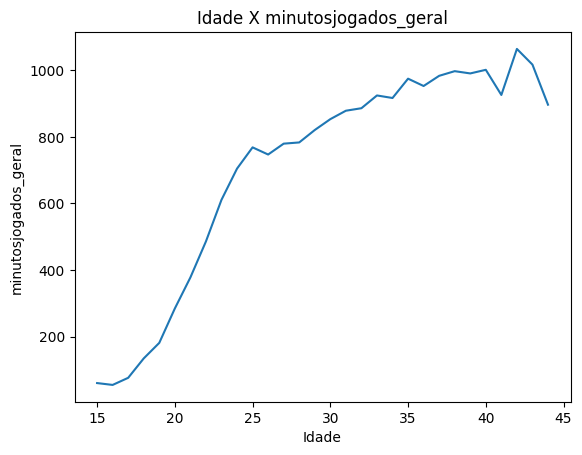

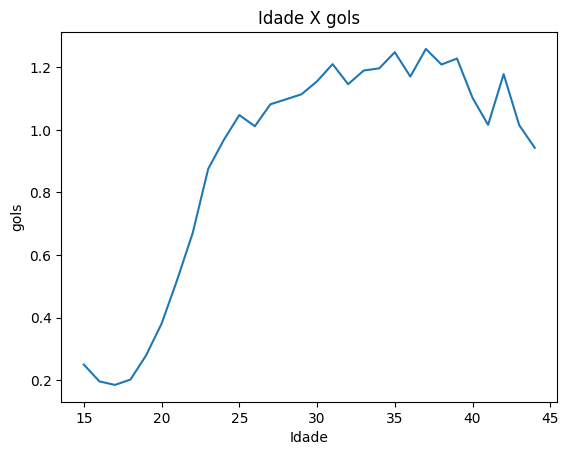

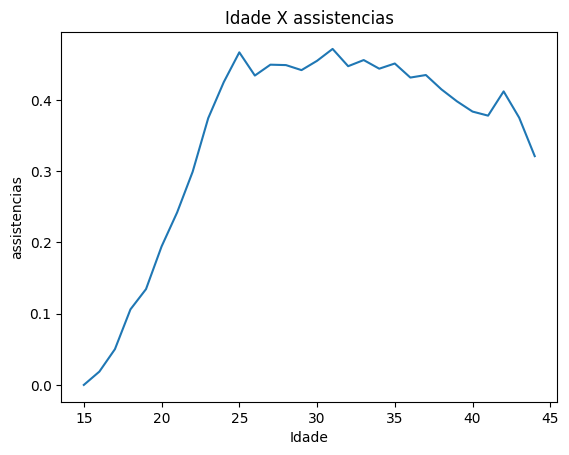

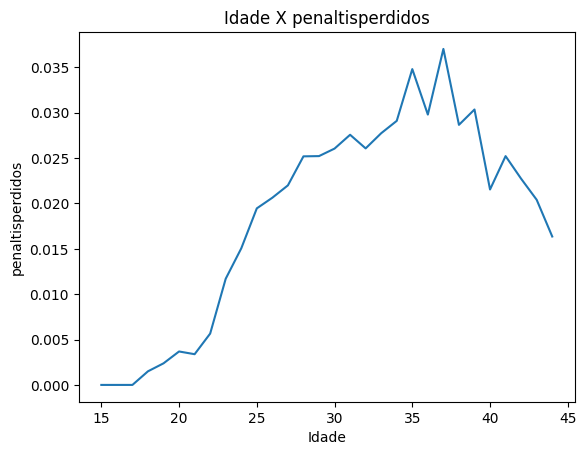

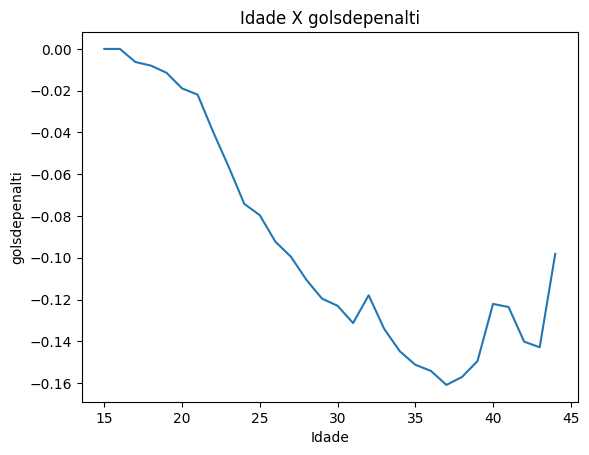

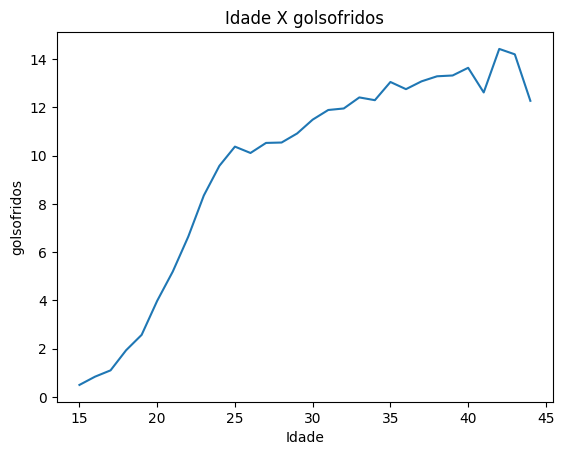

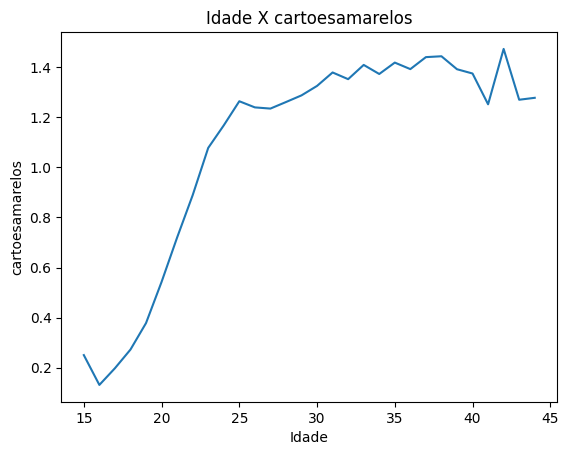

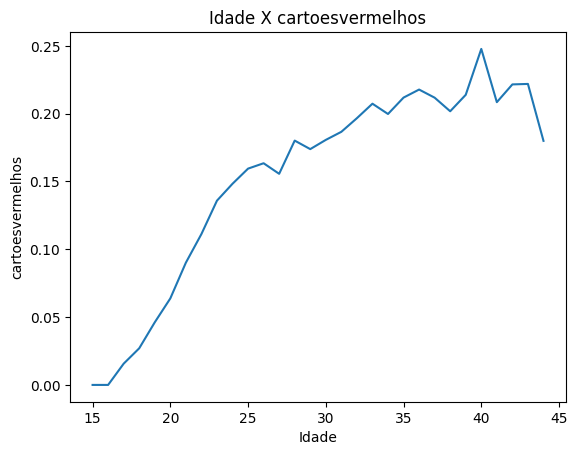

In [39]:
vl_unique = sorted(list(df['idade'].unique()))
columns = ['minutosjogados_geral', 'gols', 'assistencias', 'penaltisperdidos', 'golsdepenalti', 'golsofridos', 'cartoesamarelos', 'cartoesvermelhos']

for col in columns:
  list_vl_col_mean = []

  for vl in vl_unique:
    list_vl_col_mean.append(df[df['idade'] == vl][col].mean())

  fig, ax = plt.subplots()
  ax.plot(vl_unique, list_vl_col_mean)
  ax.set_title(f'Idade X {col}')
  ax.set_xlabel('Idade')
  ax.set_ylabel(col)

É notado varias linearidades 

In [40]:
df.idade.describe()

count    153102.000000
mean         28.319689
std           5.886002
min          15.000000
25%          24.000000
50%          28.000000
75%          32.000000
max          44.000000
Name: idade, dtype: float64

In [41]:
bins = list(range(15, 46, 10))
labels = list(range(0, 3))
df['partidade'] = pd.cut(x = df['idade'],
                             bins = bins,
                         labels = labels,
                   include_lowest = True)

## Criação da variavel Y

In [42]:
# Calculando as interações
# gols, assistencias, penaltisperdidos, golsdepenalti, golsofridos e cartões amarelos
# cada coluna está sendo multiplicada por um peso correspondente a quão "bom" é aquela ação
# Sendo considerado uma ação positiva é somado, ou se é uma ação negativa subtraido

interacoes = (np.array(df.gols) * 1.5) + np.array(df.assistencias) + (np.array(df.penaltisperdidos) * 0.6) + (np.array(df.golsdepenalti) * 1.2) - (np.array(df.golsofridos) * 0.8) - (np.array(df.cartoesamarelos) * 0.5)

# Para poder igualar o score de interações com o tempo jogado de cada jogador, iremos dividir as interações pela
# (quantidade de partidas jogadas em minuto / tempo jogado)

# Quanto mais o tempo jogado for proximo de minutos total, menos score de interações irá perder
# 300 minutos total / 300 minutos jogados == 1
# 1200/1 == 1200 (score)
# e se for menor
# 300 minutos total/ 100 minutos jogados == 3
# 1200/3 == 400 (score)

denominador = 1 + np.array(df.minutosjogadosemcasa) + np.array(df.minutosjogadosfora)
tempo = (1 + np.array(df.minutosjogados_geral)) / denominador

# Calculando o resultado final
calc = pd.Series(interacoes / tempo)

In [43]:
# Gerando as classes a partir do score de interações
df['Y'] = np.where(calc > calc.mean(), 1, 0)

# Pré Processamento

In [44]:
# Iremos realizar o treino com dois tipos de dados:
# X1 sendo as variaveis com o valor normal da coluna
# X2 sendo as mesmas variaveis porém com as classes geradas

X1 = df[['partrankdefensores', 'partrankclube', 'partrankatacante', 'partrankmeiocampo', 'partidade']]
X2 =  df[['rankdaligadefensores', 'rankdaligameiocampo', 'rankdaligaatacantes', 'ranknoclube', 'idade']]
y = df['Y']
pad = MinMaxScaler()
X_pad = pad.fit_transform(X1) 
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)

# Modelos

## Regressão Logistica

In [45]:
lr = LogisticRegression()
lr.fit(X_train2, y_train2)
acc = lr.score(X_test2, y_test2) * 100

print(f'A acuracia do modelo lr foi de: {acc:.2f}%')

A acuracia do modelo lr foi de: 64.73%


In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test) * 100

print(f'A acuracia do modelo lr foi de: {acc:.2f}%')

A acuracia do modelo lr foi de: 65.04%


O modelo lr obteve mais acertividade com o conjunto X1 de dados

In [47]:
lr_pred =  lr.predict(X_test)

## BernoulliNB

In [48]:
# Gerando o modelo com os dados de X2
median = np.median(X_train2) # Mediana dos dados de treino
if median < 0:
    median = median * -1    # binarize só ta aceitando n° positivo
    
bnb = BernoulliNB(
                    binarize = median # Forma de binarizar as 
                                      # caracteristicas não binarias
                    # > median == 1
                    # < median == 0
                 )  
bnb.fit(X_train2, y_train2)
acc = bnb.score(X_test2, y_test2) * 100

print(f'A acuracia do modelo bnb foi de: {acc:.2f}%')

A acuracia do modelo bnb foi de: 65.16%


In [49]:
# Gerando o modelo com os dados de X1
median = np.median(X_train) # Mediana dos dados de treino
if median < 0:
    median = median * -1    # binarize só ta aceitando n° positivo
    
bnb = BernoulliNB(
                    binarize = median # Forma de binarizar as 
                                      # caracteristicas não binarias
                    # > median == 1
                    # < median == 0
                 )  
bnb.fit(X_train, y_train)
acc = bnb.score(X_test, y_test) * 100

print(f'A acuracia do modelo bnb foi de: {acc:.2f}%')

A acuracia do modelo bnb foi de: 66.27%


O conjunto X1 trouxe mais acertividade 

In [50]:
bnb_pred =  bnb.predict(X_test)

## Arvore de Decisão

Definindo as melhores metricas para o modelo

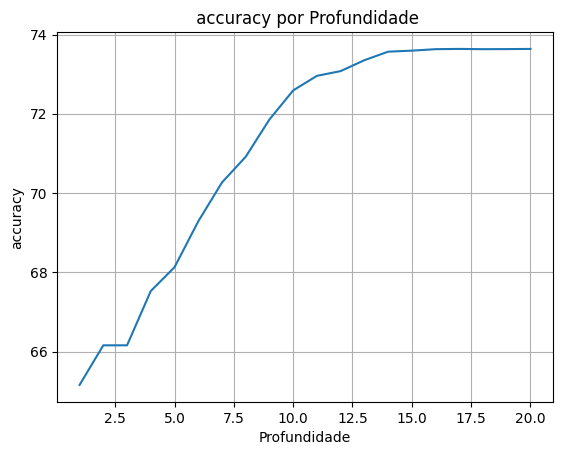

In [51]:
accuracy=[]
for depth in list(range(1,21)):
    dtc = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    dtc.fit(X_train, y_train)
    acc = (dtc.score(X_test, y_test)*100).round(4)
    accuracy.append(acc)

df_graph = pd.DataFrame()
df_graph['accuracy']= accuracy
df_graph['Profundidade']=list(range(1,21))
    
fig, ax = plt.subplots()
plt.plot(df_graph['Profundidade'], df_graph['accuracy'])
ax.grid()
ax.set_title(' accuracy por Profundidade')
ax.set_ylabel('accuracy')
ax.set_xlabel('Profundidade')
plt.show()

In [52]:
df_graph.query('Profundidade > 11')

,accuracy,Profundidade
11,73.0770,12
12,73.3513,13
13,73.5669,14
14,73.5930,15
15,73.6300,16
16,73.6365,17
17,73.6300,18
18,73.6322,19
19,73.6365,20


A profundidade 16 trouxe a maior acuracia

In [53]:
# Gerando o modelo com os dados de X1
dtc = DecisionTreeClassifier(max_depth=16, criterion='entropy')
dtc.fit(X_train, y_train)
acc = dtc.score(X_test, y_test) * 100

print(f'A acuracia do modelo dtc foi de: {acc:.2f}%')

A acuracia do modelo dtc foi de: 73.63%


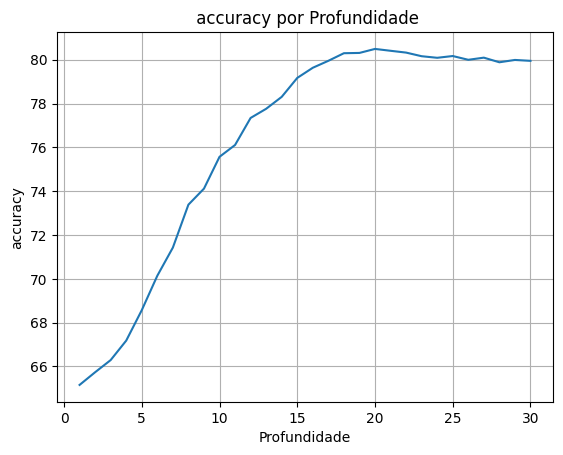

In [54]:
accuracy=[]
for depth in list(range(1,31)):
    dtc = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    dtc.fit(X_train2, y_train2)
    acc = (dtc.score(X_test2, y_test2)*100).round(4)
    accuracy.append(acc)

df_graph = pd.DataFrame()
df_graph['accuracy']= accuracy
df_graph['Profundidade']=list(range(1,31))
    
fig, ax = plt.subplots()
plt.plot(df_graph['Profundidade'], df_graph['accuracy'])
ax.grid()
ax.set_title(' accuracy por Profundidade')
ax.set_ylabel('accuracy')
ax.set_xlabel('Profundidade')
plt.show()

In [55]:
df_graph.query('Profundidade > 15')

,accuracy,Profundidade
15,79.6347,16
16,79.9525,17
17,80.2987,18
18,80.3118,19
19,80.4947,20
20,80.4097,21
21,80.3270,22
22,80.1615,23
23,80.0897,24
24,80.1703,25


Com a profundidade 20 no conjunto X2 de dados encontramos uma maior acuracia

In [56]:
# Gerando o modelo com os dados de X2
dtc = DecisionTreeClassifier(max_depth=20, criterion='entropy')
dtc.fit(X_train2, y_train2)
acc = dtc.score(X_test2, y_test2) * 100

print(f'A acuracia do modelo dtc foi de: {acc:.2f}%')

A acuracia do modelo dtc foi de: 80.37%


In [57]:
dtc_pred =  dtc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## K-Vizinhos

Escolhendo as melhores metricas para o modelo KNN

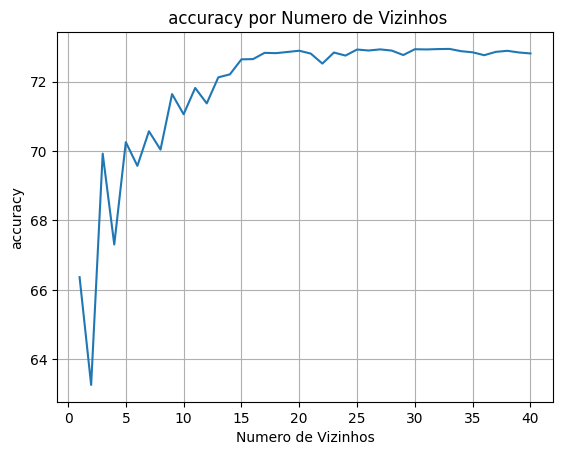

In [58]:
accuracy=[]
for nn in list(range(1,41)):
    kn = KNeighborsClassifier(n_neighbors=nn)
    kn.fit(X_train, y_train)
    acc = (kn.score(X_test, y_test)*100).round(4)
    accuracy.append(acc)

df_graph = pd.DataFrame()
df_graph['accuracy']= accuracy
df_graph['N_vizinhos']=list(range(1,41))
    
fig, ax = plt.subplots()
plt.plot(df_graph['N_vizinhos'], df_graph['accuracy'])
ax.grid()
ax.set_title(' accuracy por Numero de Vizinhos')
ax.set_ylabel('accuracy')
ax.set_xlabel('Numero de Vizinhos')
plt.show()

In [59]:
df_graph.query('N_vizinhos > 14 and N_vizinhos < 25')

,accuracy,N_vizinhos
14,72.6437,15
15,72.6503,16
16,72.8310,17
17,72.8223,18
18,72.8571,19
19,72.8919,20
20,72.8092,21
21,72.5218,22
22,72.8397,23
23,72.7526,24


17 vizinhos foi a nossa melhor acuracia

In [60]:
# Gerando o modelo com os dados de X1
kn = KNeighborsClassifier(n_neighbors=17)
kn.fit(X_train, y_train)
acc = kn.score(X_test, y_test) * 100

print(f'A acuracia do modelo kn foi de: {acc:.2f}%')

A acuracia do modelo kn foi de: 72.83%


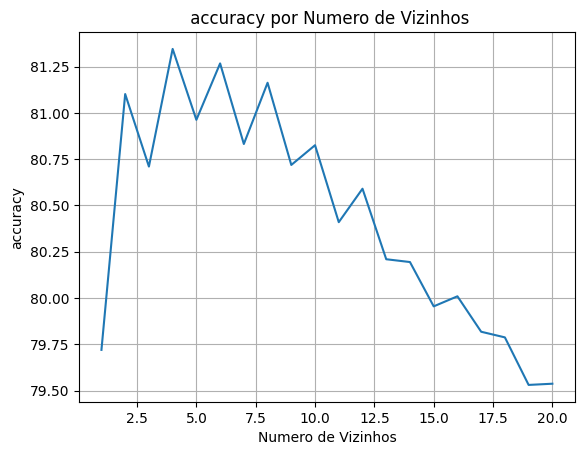

In [61]:
accuracy=[]
for nn in list(range(1,21)):
    kn = KNeighborsClassifier(n_neighbors=nn)
    kn.fit(X_train2, y_train2)
    acc = (kn.score(X_test2, y_test2)*100).round(4)
    accuracy.append(acc)

df_graph = pd.DataFrame()
df_graph['accuracy']= accuracy
df_graph['N_vizinhos']=list(range(1,21))
    
fig, ax = plt.subplots()
plt.plot(df_graph['N_vizinhos'], df_graph['accuracy'])
ax.grid()
ax.set_title(' accuracy por Numero de Vizinhos')
ax.set_ylabel('accuracy')
ax.set_xlabel('Numero de Vizinhos')
plt.show()

In [62]:
df_graph.query('N_vizinhos > 2 and N_vizinhos < 10')

,accuracy,N_vizinhos
2,80.7102,3
3,81.3459,4
4,80.9627,5
5,81.2676,6
6,80.8321,7
7,81.1630,8
8,80.7189,9


Com 4 vizinhos é encontrado uma acuracia maior com menos vizinhos que a melhor alternativa do conjunto X1

In [63]:
# Gerando o modelo com os dados de X2
kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train2, y_train2)
acc = kn.score(X_test2, y_test2) * 100

print(f'A acuracia do modelo kn foi de: {acc:.2f}%')

A acuracia do modelo kn foi de: 81.35%


O conjunto X2 trouxe mais acertividade 

In [64]:
kn_pred =  kn.predict(X_test2)

# Avaliando os Modelos

In [65]:
def avalia_Classificacao(model, x, y_test, pred, labels=['Positives', 'Negatives']):
    # model predicts probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_) != 2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:, 1]
    elif model.classes_[0] == 1:
        pos_p = p[:, 0]

    # FIGURE
    plt.figure(figsize=[15, 4])

    # 1 -- Confusion matrix
    cm_RL = confusion_matrix(y_test, pred)
    plt.subplot(131)
    ax = sns.heatmap(cm_RL, annot=True, cmap='Blues', cbar=False,
                     annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
                'False Negatives', 'True Positives']
    for i, t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)

    # 2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos': pos_p, 'target': y_test})
    plt.subplot(132)
    plt.hist(df[df.target == 1].probPos, density=True,
             alpha=.5, color='green', label=labels[0])
    plt.hist(df[df.target == 0].probPos, density=True,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0, 1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")

    # 3 -- ROC curve with annotated decision point
    plt.subplot(133)
    fpr, tpr, thresholds = roc_curve(y_test, pos_p)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    tn, fp, fn, tp = [i for i in cm_RL.ravel()]
    plt.plot(fp / (fp + tn), tp / (tp + fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()

    # Print and Return the F1 score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision, 2)} | '
        f'Recall: {round(recall, 2)} | '
        f'F1 Score: {round(F1, 2)} | '
    )
    print(printout)
    return F1

### LR

              precision    recall  f1-score   support

           0       0.49      0.09      0.15     16003
           1       0.66      0.95      0.78     29928

    accuracy                           0.65     45931
   macro avg       0.58      0.52      0.47     45931
weighted avg       0.60      0.65      0.56     45931



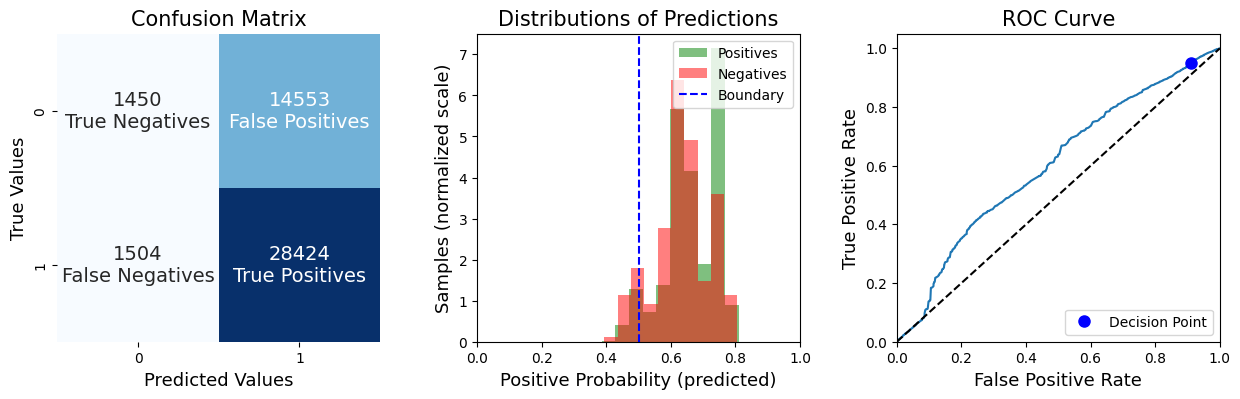

Precision: 0.66 | Recall: 0.95 | F1 Score: 0.78 | 


0.7797544750017147

In [66]:
print(classification_report(y_test, lr_pred))
avalia_Classificacao(lr, X_test, y_test, lr_pred)

* Analisando a matrix de confunsão, recall e o f1 score. É notado que o modelo na maior parte das predições ele previu a classe positiva, já que é a onde tem mais dados 
* Na distribuição de predições, é notado que o modelo não consegue prever a classe negativa
* A curva ROC mostra que não muita especificidade no nosso modelo
* Conseguimos obter 65.04% de acuracia

### BNB

              precision    recall  f1-score   support

           0       0.56      0.14      0.23     16003
           1       0.67      0.94      0.78     29928

    accuracy                           0.66     45931
   macro avg       0.62      0.54      0.51     45931
weighted avg       0.63      0.66      0.59     45931



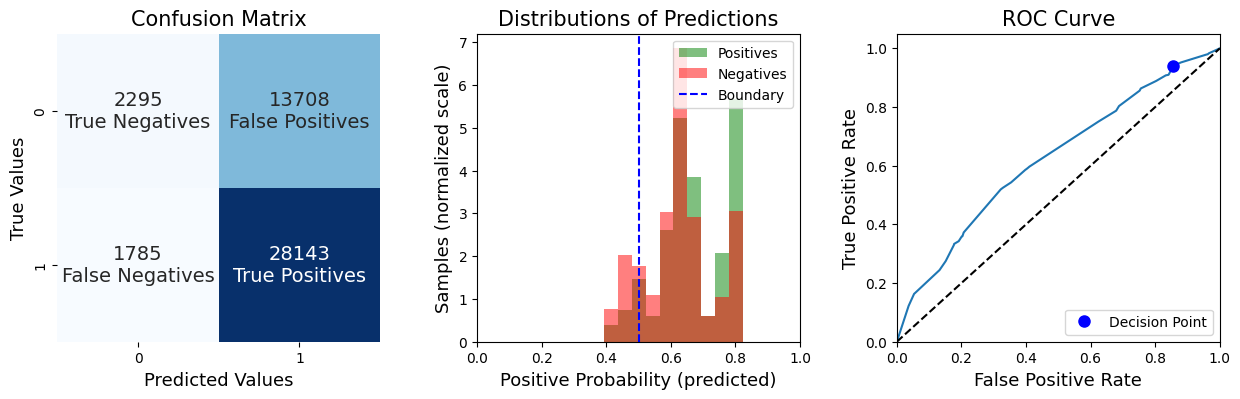

Precision: 0.67 | Recall: 0.94 | F1 Score: 0.78 | 


0.784156926120453

In [ ]:
print(classification_report(y_test, bnb_pred))
avalia_Classificacao(bnb, X_test, y_test, bnb_pred)

* Temos uma precisão ruim entre as classes e recall desbalanceado para a classe 1.
* Na matrix de confusão notamos que o modelo praticamente previo uma classes.
* A distribuição das predições poderia estar mais separada
* A curva ROC mostra que o nosso modelo quase não tem muita especificidade nas predições
* Obtemos uma acuracia de (66.27%)

### DTC

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16003
           1       0.65      1.00      0.79     29928

    accuracy                           0.65     45931
   macro avg       0.33      0.50      0.39     45931
weighted avg       0.42      0.65      0.51     45931



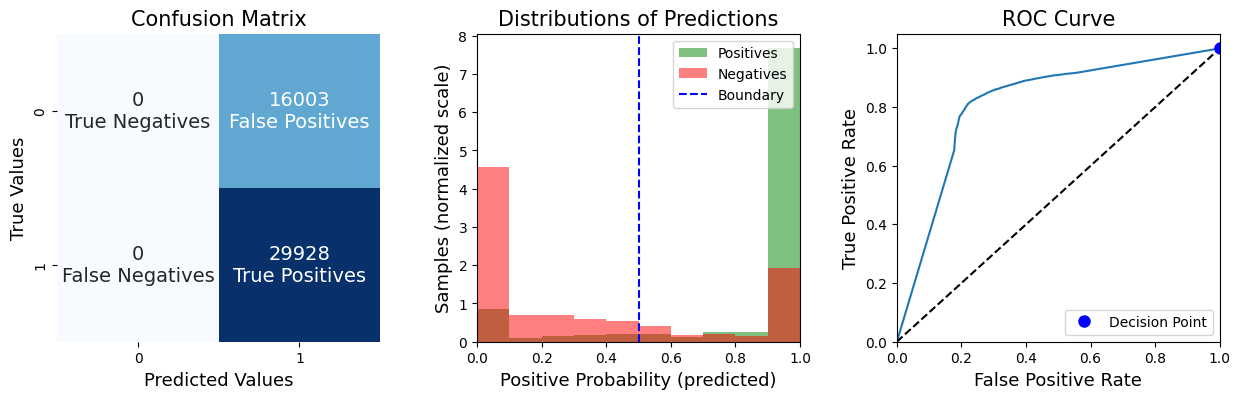

Precision: 0.65 | Recall: 1.0 | F1 Score: 0.79 | 


0.789042829459919

In [ ]:
print(classification_report(y_test, dtc_pred))
avalia_Classificacao(dtc, X_test2, y_test2, dtc_pred)

* O modelo DTC está pessimo, já que a estrategia dele foi apenas prever todos os registros para uma unica classe, conseguimos notar isso pela precisão, recall e f1-score entre as classes e pela matrix de confusão. E por isso obtivemos uma das melhores acuracias(80.38%). 
* Sua distribuição de predições ficou boa, porém isso se deve por y possuir mais classes positivas do que negativa
* Na curva ROC podemos notar que não especificidade nas predições do nosso modelo

### KN

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     16003
           1       0.89      0.81      0.85     29928

    accuracy                           0.81     45931
   macro avg       0.80      0.81      0.80     45931
weighted avg       0.82      0.81      0.82     45931



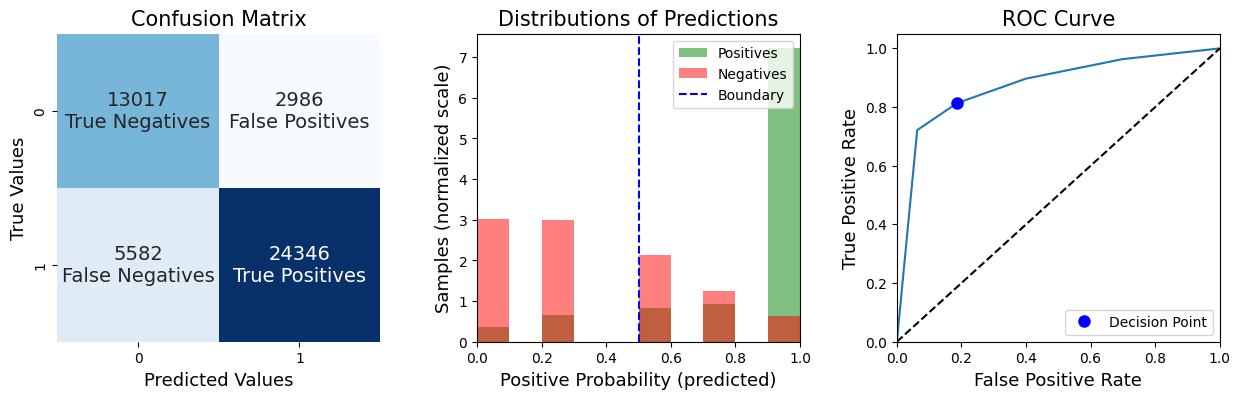

Precision: 0.89 | Recall: 0.81 | F1 Score: 0.85 | 


0.8503667481662591

In [ ]:
print(classification_report(y_test, kn_pred))
avalia_Classificacao(kn, X_test2, y_test2, kn_pred)

* Nossa precisão, recall e f1-score está boa para as duas classes
* Diferente dos modelos anteriores obtivemos predições distribuidas entre as duas classes, comparando os acertos com os erros está bom
* A distribuição das predições está boa, levando em consideração que a classes positiva está bem ao canto direito, enquanto as predições da classe negativa está bem espalhada, significando que o modelo tem uma dificuldade em classificar a classe negativa (0)
* Aqui temos a melhor curva ROC entre os modelos, temos cerca de 80% especificidade e 80% sensibilidade
* Conseguimos uma acuracia de 81.35%

# Conclusão 

Podemos dizer que o melhor modelo foi o KNN, já que retornou a melhor acuracia e também o que mais conseguiu classificar a nossa classe negativa (0).